In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pandas as pd
import numpy as np
import os
import string
from nltk.tokenize import word_tokenize
import nltk
import tensorflow as tf
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SpatialDropout1D, Flatten
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
BBC_Train = pd.read_csv('BBC News Train.csv')
BBC_Train.head(10)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business
5,1582,howard truanted to play snooker conservative...,politics
6,651,wales silent on grand slam talk rhys williams ...,sport
7,1797,french honour for director parker british film...,entertainment
8,2034,car giant hit by mercedes slump a slump in pro...,business
9,1866,fockers fuel festive film chart comedy meet th...,entertainment


Removing "ArticleId" column

In [3]:
train_data = BBC_Train[["Text","Category"]]
train_data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [4]:
train_data.columns

Index(['Text', 'Category'], dtype='object')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      1490 non-null   object
 1   Category  1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


There are 1490 instances available for training

In [6]:
Categories = train_data['Category'].unique()
Categories

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

# Data Cleaning



*    [str.strip()](https://www.w3resource.com/pandas/series/series-str-strip.php#:~:text=The%20str.,from%20left%20and%20right%20sides.) is used for removing leading and trailing characters
* [replace using regex](https://www.geeksforgeeks.org/replace-values-in-pandas-dataframe-using-regex/)



In [7]:
train_data['Text'] = train_data['Text'].str.strip()
train_data.head()

<ipython-input-7-442dc4fd3639>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Text'] = train_data['Text'].str.strip()


,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [9]:
train_data = train_data.replace('\n',' ',regex=True)
train_data.head(10)

,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business
5,howard truanted to play snooker conservative...,politics
6,wales silent on grand slam talk rhys williams ...,sport
7,french honour for director parker british film...,entertainment
8,car giant hit by mercedes slump a slump in pro...,business
9,fockers fuel festive film chart comedy meet th...,entertainment


In [10]:
train_data.to_csv('_finalCleaned.csv') #Save cleaned data into a CSV file

# Data Preprocessing

In [11]:
data = pd.read_csv("_finalCleaned.csv").drop('Unnamed: 0',axis=1)

In [12]:
pd.set_option('display.max_colwidth',None) #Sets the maximum width of a column to None
data.head()

,Text,Category
0,worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness. cynthia cooper worldcom s ex-head of internal accounting alerted directors to irregular accounting practices at the us telecoms giant in 2002. her warnings led to the collapse of the firm following the discovery of an $11bn (£5.7bn) accounting fraud. mr ebbers has pleaded not guilty to charges of fraud and conspiracy. prosecution lawyers have argued that mr ebbers orchestrated a series of accounting tricks at worldcom ordering employees to hide expenses and inflate revenues to meet wall street earnings estimates. but ms cooper who now runs her own consulting business told a jury in new york on wednesday that external auditors arthur andersen had approved worldcom s accounting in early 2001 and 2002. she said andersen had given a green light to the procedures and practices used by worldcom. mr ebber s lawyers have said he was unaware of the fraud arguing that auditors did not alert him to any problems. ms cooper also said that during shareholder meetings mr ebbers often passed over technical questions to the company s finance chief giving only brief answers himself. the prosecution s star witness former worldcom financial chief scott sullivan has said that mr ebbers ordered accounting adjustments at the firm telling him to hit our books . however ms cooper said mr sullivan had not mentioned anything uncomfortable about worldcom s accounting during a 2001 audit committee meeting. mr ebbers could face a jail sentence of 85 years if convicted of all the charges he is facing. worldcom emerged from bankruptcy protection in 2004 and is now known as mci. last week mci agreed to a buyout by verizon communications in a deal valued at $6.75bn.,business
1,german business confidence slides german business confidence fell in february knocking hopes of a speedy recovery in europe s largest economy. munich-based research institute ifo said that its confidence index fell to 95.5 in february from 97.5 in january its first decline in three months. the study found that the outlook in both the manufacturing and retail sectors had worsened. observers had been hoping that a more confident business sector would signal that economic activity was picking up. we re surprised that the ifo index has taken such a knock said dz bank economist bernd weidensteiner. the main reason is probably that the domestic economy is still weak particularly in the retail trade. economy and labour minister wolfgang clement called the dip in february s ifo confidence figure a very mild decline . he said that despite the retreat the index remained at a relatively high level and that he expected a modest economic upswing to continue. germany s economy grew 1.6% last year after shrinking in 2003. however the economy contracted by 0.2% during the last three months of 2004 mainly due to the reluctance of consumers to spend. latest indications are that growth is still proving elusive and ifo president hans-werner sinn said any improvement in german domestic demand was sluggish. exports had kept things going during the first half of 2004 but demand for exports was then hit as the value of the euro hit record levels making german products less competitive overseas. on top of that the unemployment rate has been stuck at close to 10% and manufacturing firms including daimlerchrysler siemens and volkswagen have been negotiating with unions over cost cutting measures. analysts said that the ifo figures and germany s continuing problems may delay an interest rate rise by the european central bank. eurozone interest rates are at 2% but comments from senior officials have recently focused on the threat of inflation prompting fears that interest rates may rise.,business
2,bbc poll indicates economic gloom citizens in a majority of nations surveyed in a bbc world service poll believe the world 

In [13]:
# Imortant for data Preprocessing
punctuation = string.punctuation
print("Punctuations: ", punctuation)

stop_words = nltk.corpus.stopwords.words('english')
print("Stop Words: ", stop_words)

porter_stemmer = PorterStemmer()

wordLemmatizer = WordNetLemmatizer()

def removePunctuation(text):
    text = "".join([word for word in text if word not in punctuation])
    return text

def removeStopWords(text):
    text= [word for word in text if word not in stop_words]
    return text

porter_stemmer = PorterStemmer()
def stemmingText(text):
    text = [porter_stemmer.stem(word) for word in text]
    return text

wordLemmatizer = WordNetLemmatizer()
def lemmatizingText(text):
    text = [wordLemmatizer.lemmatize(word) for word in text]
    return text

Punctuations:  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
Stop Words:  ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'o

### Testing Functions

In [15]:
text = "Hi! This is our NLP Project. "

text = removePunctuation(text)
text

'Hi This is our NLP Project '

In [18]:
#Word Tokenix=zation
import nltk
nltk.download('punkt_tab')
text = word_tokenize(text)
text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Hi', 'This', 'is', 'our', 'NLP', 'Project']

In [20]:
text = removeStopWords(text)
text

['Hi', 'This', 'NLP', 'Project']

In [21]:
text = stemmingText(text)
text

['hi', 'thi', 'nlp', 'project']

In [22]:
text = lemmatizingText(text)
text

['hi', 'thi', 'nlp', 'project']

In [23]:
def DataPreprocessing(text_data):

  # Removing Punctuation
  text_data = text_data.apply(removePunctuation)

  text_data = text_data.apply(lambda x :x.lower())

  # Word Tokenizatrion
  text_data = text_data.apply(word_tokenize)

  #Removing Stopwords
  text_data = text_data.apply(removeStopWords)

  #Stemming
  text_data = text_data.apply(stemmingText)

  #Lemmatizing
  text_data = text_data.apply(lemmatizingText)

  return text_data

In [24]:
proccessed_data = data[['Text']].apply(DataPreprocessing)
proccessed_data.head()

,Text
0,"[worldcom, exboss, launch, defenc, lawyer, defend, former, worldcom, chief, berni, ebber, batteri, fraud, charg, call, compani, whistleblow, first, wit, cynthia, cooper, worldcom, exhead, intern, account, alert, director, irregular, account, practic, u, telecom, giant, 2002, warn, led, collaps, firm, follow, discoveri, 11bn, £57bn, account, fraud, mr, ebber, plead, guilti, charg, fraud, conspiraci, prosecut, lawyer, argu, mr, ebber, orchestr, seri, account, trick, worldcom, order, employe, hide, expens, inflat, revenu, meet, wall, street, earn, estim, m, cooper, run, consult, busi, told, juri, new, york, wednesday, extern, auditor, arthur, andersen, approv, worldcom, account, earli, 2001, 2002, said, andersen, given, green, light, procedur, practic, use, ...]"
1,"[german, busi, confid, slide, german, busi, confid, fell, februari, knock, hope, speedi, recoveri, europ, largest, economi, munichbas, research, institut, ifo, said, confid, index, fell, 955, februari, 975, januari, first, declin, three, month, studi, found, outlook, manufactur, retail, sector, worsen, observ, hope, confid, busi, sector, would, signal, econom, activ, pick, surpris, ifo, index, taken, knock, said, dz, bank, economist, bernd, weidenstein, main, reason, probabl, domest, economi, still, weak, particularli, retail, trade, economi, labour, minist, wolfgang, clement, call, dip, februari, ifo, confid, figur, mild, declin, said, despit, retreat, index, remain, rel, high, level, expect, modest, econom, upsw, continu, germani, economi, grew, 16, ...]"
2,"[bbc, poll, indic, econom, gloom, citizen, major, nation, survey, bbc, world, servic, poll, believ, world, economi, worsen, respond, also, said, nation, economi, get, wors, ask, famili, financi, outlook, major, 14, countri, said, posit, futur, almost, 23, 000, peopl, 22, countri, question, poll, mostli, conduct, asian, tsunami, disast, poll, found, major, plural, peopl, 13, countri, believ, economi, go, downhil, compar, respond, nine, countri, believ, improv, survey, three, countri, split, percentag, term, averag, 44, respond, countri, said, world, economi, get, wors, compar, 34, said, improv, similarli, 48, pessimist, nation, economi, 41, optimist, 47, saw, famili, econom, condit, improv, 36, said, get, wors, ...]"
3,"[lifestyl, govern, mobil, choic, faster, better, funkier, hardwar, alon, go, help, phone, firm, sell, handset, research, suggest, instead, phone, firm, keen, get, custom, push, technolog, sake, consum, far, interest, handset, fit, lifestyl, screen, size, onboard, memori, chip, insid, show, indepth, studi, handset, maker, ericsson, histor, industri, much, focu, use, technolog, said, dr, michael, bjorn, senior, advisor, mobil, medium, ericsson, consum, enterpris, lab, stop, say, technolog, chang, live, said, tri, speak, consum, languag, help, see, fit, told, bbc, news, websit, studi, ericsson, interview, 14, 000, mobil, phone, owner, way, use, phone, peopl, habit, remain, said, dr, bjorn, move, activ, mobil, phone, ...]"
4,"[enron, bos, 168m, payout, eighteen, former, enron, director, agre, 168m, £89m, settlement, deal, sharehold, lawsuit, collaps, energi, firm, lead, plaintiff, univers, california, announc, news, ad, 10, former, director, pay, 13m, pocket, settlement, put, court, approv, next, week, enron, went, bankrupt, 2001, emerg, hidden, hundr, million, dollar, debt, collaps, firm, seventh, biggest, public, u, compani, revenu, demis, sent, shockwav, financi, market, dent, investor, confid, corpor, america, settlement, signific, hold, outsid, director, least, partial, person, respons, william, lerach, lawyer, lead, class, action, suit, enron, said, hope, help, send, messag, corpor, boardroom, import, director, perform, legal, duti, ad, term, 168m, settlement, 155m, cover, ...]"


In [25]:
train = pd.DataFrame()
train['article'] = proccessed_data
train['category'] = data['Category']
train.head()

,article,category
0,"[worldcom, exboss, launch, defenc, lawyer, defend, former, worldcom, chief, berni, ebber, batteri, fraud, charg, call, compani, whistleblow, first, wit, cynthia, cooper, worldcom, exhead, intern, account, alert, director, irregular, account, practic, u, telecom, giant, 2002, warn, led, collaps, firm, follow, discoveri, 11bn, £57bn, account, fraud, mr, ebber, plead, guilti, charg, fraud, conspiraci, prosecut, lawyer, argu, mr, ebber, orchestr, seri, account, trick, worldcom, order, employe, hide, expens, inflat, revenu, meet, wall, street, earn, estim, m, cooper, run, consult, busi, told, juri, new, york, wednesday, extern, auditor, arthur, andersen, approv, worldcom, account, earli, 2001, 2002, said, andersen, given, green, light, procedur, practic, use, ...]",business
1,"[german, busi, confid, slide, german, busi, confid, fell, februari, knock, hope, speedi, recoveri, europ, largest, economi, munichbas, research, institut, ifo, said, confid, index, fell, 955, februari, 975, januari, first, declin, three, month, studi, found, outlook, manufactur, retail, sector, worsen, observ, hope, confid, busi, sector, would, signal, econom, activ, pick, surpris, ifo, index, taken, knock, said, dz, bank, economist, bernd, weidenstein, main, reason, probabl, domest, economi, still, weak, particularli, retail, trade, economi, labour, minist, wolfgang, clement, call, dip, februari, ifo, confid, figur, mild, declin, said, despit, retreat, index, remain, rel, high, level, expect, modest, econom, upsw, continu, germani, economi, grew, 16, ...]",business
2,"[bbc, poll, indic, econom, gloom, citizen, major, nation, survey, bbc, world, servic, poll, believ, world, economi, worsen, respond, also, said, nation, economi, get, wors, ask, famili, financi, outlook, major, 14, countri, said, posit, futur, almost, 23, 000, peopl, 22, countri, question, poll, mostli, conduct, asian, tsunami, disast, poll, found, major, plural, peopl, 13, countri, believ, economi, go, downhil, compar, respond, nine, countri, believ, improv, survey, three, countri, split, percentag, term, averag, 44, respond, countri, said, world, economi, get, wors, compar, 34, said, improv, similarli, 48, pessimist, nation, economi, 41, optimist, 47, saw, famili, econom, condit, improv, 36, said, get, wors, ...]",business
3,"[lifestyl, govern, mobil, choic, faster, better, funkier, hardwar, alon, go, help, phone, firm, sell, handset, research, suggest, instead, phone, firm, keen, get, custom, push, technolog, sake, consum, far, interest, handset, fit, lifestyl, screen, size, onboard, memori, chip, insid, show, indepth, studi, handset, maker, ericsson, histor, industri, much, focu, use, technolog, said, dr, michael, bjorn, senior, advisor, mobil, medium, ericsson, consum, enterpris, lab, stop, say, technolog, chang, live, said, tri, speak, consum, languag, help, see, fit, told, bbc, news, websit, studi, ericsson, interview, 14, 000, mobil, phone, owner, way, use, phone, peopl, habit, remain, said, dr, bjorn, move, activ, mobil, phone, ...]",tech
4,"[enron, bos, 168m, payout, eighteen, former, enron, director, agre, 168m, £89m, settlement, deal, sharehold, lawsuit, collaps, energi, firm, lead, plaintiff, univers, california, announc, news, ad, 10, former, director, pay, 13m, pocket, settlement, put, court, approv, next, week, enron, went, bankrupt, 2001, emerg, hidden, hundr, million, dollar, debt, collaps, firm, seventh, biggest, public, u, compani, revenu, demis, sent, shockwav, financi, market, dent, investor, confid, corpor, america, settlement, signific, hold, outsid, director, least, partial, person, respons, william, lerach, lawyer, lead, class, action, suit, enron, said, hope, help, send, messag, corpor, boardroom, import, director, perform, legal, duti, ad, term, 168m, settlement, 155m, cover, ...]",business


In [26]:
!pip install wordcloud

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud

def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [28]:
drive_service = google_authenticate()

In [29]:
def read_file(file_id):
  """
  Download file from Google Drive
  Argument: file_id
  Returns: downloaded file
  """

  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded

In [30]:
text_file = read_file('1NrodQrpaw-9xU2lCYo8H8fiW6A1RGdwt')

In [31]:
document = text_file.read()
print(len(document))
print(document[0:100])

148570
b"\xef\xbb\xbfProject Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll\r\n\r\nThis eBook is for the u"


In [32]:
train.to_csv('_finalProcessed.csv')   #Save processed data into a CSV file

# Model Training

In [33]:
#Reading preprocessed data
data = pd.read_csv("_finalProcessed.csv").drop(columns=['Unnamed: 0'])
data.head()

,article,category
0,"['worldcom', 'exboss', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper', 'worldcom', 'exhead', 'intern', 'account', 'alert', 'director', 'irregular', 'account', 'practic', 'u', 'telecom', 'giant', '2002', 'warn', 'led', 'collaps', 'firm', 'follow', 'discoveri', '11bn', '£57bn', 'account', 'fraud', 'mr', 'ebber', 'plead', 'guilti', 'charg', 'fraud', 'conspiraci', 'prosecut', 'lawyer', 'argu', 'mr', 'ebber', 'orchestr', 'seri', 'account', 'trick', 'worldcom', 'order', 'employe', 'hide', 'expens', 'inflat', 'revenu', 'meet', 'wall', 'street', 'earn', 'estim', 'm', 'cooper', 'run', 'consult', 'busi', 'told', 'juri', 'new', 'york', 'wednesday', 'extern', 'auditor', 'arthur', 'andersen', 'approv', 'worldcom', 'account', 'earli', '2001', '2002', 'said', 'andersen', 'given', 'green', 'light', 'procedur', 'practic', 'use', 'worldcom', 'mr', 'ebber', 'lawyer', 'said', 'unawar', 'fraud', 'argu', 'auditor', 'alert', 'problem', 'm', 'cooper', 'also', 'said', 'sharehold', 'meet', 'mr', 'ebber', 'often', 'pas', 'technic', 'question', 'compani', 'financ', 'chief', 'give', 'brief', 'answer', 'prosecut', 'star', 'wit', 'former', 'worldcom', 'financi', 'chief', 'scott', 'sullivan', 'said', 'mr', 'ebber', 'order', 'account', 'adjust', 'firm', 'tell', 'hit', 'book', 'howev', 'm', 'cooper', 'said', 'mr', 'sullivan', 'mention', 'anyth', 'uncomfort', 'worldcom', 'account', '2001', 'audit', 'committe', 'meet', 'mr', 'ebber', 'could', 'face', 'jail', 'sentenc', '85', 'year', 'convict', 'charg', 'face', 'worldcom', 'emerg', 'bankruptci', 'protect', '2004', 'known', 'mci', 'last', 'week', 'mci', 'agre', 'buyout', 'verizon', 'commun', 'deal', 'valu', '675bn']",business
1,"['german', 'busi', 'confid', 'slide', 'german', 'busi', 'confid', 'fell', 'februari', 'knock', 'hope', 'speedi', 'recoveri', 'europ', 'largest', 'economi', 'munichbas', 'research', 'institut', 'ifo', 'said', 'confid', 'index', 'fell', '955', 'februari', '975', 'januari', 'first', 'declin', 'three', 'month', 'studi', 'found', 'outlook', 'manufactur', 'retail', 'sector', 'worsen', 'observ', 'hope', 'confid', 'busi', 'sector', 'would', 'signal', 'econom', 'activ', 'pick', 'surpris', 'ifo', 'index', 'taken', 'knock', 'said', 'dz', 'bank', 'economist', 'bernd', 'weidenstein', 'main', 'reason', 'probabl', 'domest', 'economi', 'still', 'weak', 'particularli', 'retail', 'trade', 'economi', 'labour', 'minist', 'wolfgang', 'clement', 'call', 'dip', 'februari', 'ifo', 'confid', 'figur', 'mild', 'declin', 'said', 'despit', 'retreat', 'index', 'remain', 'rel', 'high', 'level', 'expect', 'modest', 'econom', 'upsw', 'continu', 'germani', 'economi', 'grew', '16', 'last', 'year', 'shrink', '2003', 'howev', 'economi', 'contract', '02', 'last', 'three', 'month', '2004', 'mainli', 'due', 'reluct', 'consum', 'spend', 'latest', 'indic', 'growth', 'still', 'prove', 'elus', 'ifo', 'presid', 'hanswern', 'sinn', 'said', 'improv', 'german', 'domest', 'demand', 'sluggish', 'export', 'kept', 'thing', 'go', 'first', 'half', '2004', 'demand', 'export', 'hit', 'valu', 'euro', 'hit', 'record', 'level', 'make', 'german', 'product', 'less', 'competit', 'oversea', 'top', 'unemploy', 'rate', 'stuck', 'close', '10', 'manufactur', 'firm', 'includ', 'daimlerchrysl', 'siemen', 'volkswagen', 'negoti', 'union', 'cost', 'cut', 'measur', 'analyst', 'said', 'ifo', 'figur', 'germani', 'continu', 'problem', 'may', 'delay', 'interest', 'rate', 'rise', 'european', 'central', 'bank', 'eurozon', 'interest', 'rate', '2', 'comment', 'senior', 'offici', 'recent', 'focus', 'threat', 'inflat', 'prompt', 'fear', 'interest', 'rate', 'may', 'rise']",business
2,"['bbc', 'poll', 'indic', 'econom', 'gloom', 'citizen', 'major', 'nation', 'survey', 'bbc', 'world', 'servic', 'poll', 'believ', 'world', 'economi', 'worsen', 'respond', 'also', 'said', 'nation', 'economi', 'get', 'wors', 'ask', 'fam

In [34]:
epochs = 10
emb_dim = 100
batch_size = 50
n_most_common_words = 80000
max_len = 250

In [35]:
tokenizer = Tokenizer(num_words=n_most_common_words,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~' ,lower=True)
tokenizer.fit_on_texts(data['article'].values)
wordIndex = tokenizer.word_index
print(f'Number of Unique tokens is {len(wordIndex)}')

Number of Unique tokens is 19932


In [36]:
X = tokenizer.texts_to_sequences(data['article'].values)
X = pad_sequences(X,maxlen=max_len)
print(f'The shape of data tensor is {X.shape}')

The shape of data tensor is (1490, 250)


In [37]:
Y = pd.get_dummies(data['category']).values
print(f'The shape of label tensor is {Y.shape}')

The shape of label tensor is (1490, 5)


In [38]:
X_train , X_test , y_train ,y_test = train_test_split(X,Y,test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1341, 250), (149, 250), (1341, 5), (149, 5))

## LSTM Model


In [72]:
pip install transformers

In [40]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(5, activation='softmax'))

((1341, 250), (1341, 5), (149, 250), (149, 5))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.01)])

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 32s 998ms/step - acc: 0.2105 - loss: 1.6104 - val_acc: 0.3048 - val_loss: 1.6045
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 496ms/step - acc: 0.2344 - loss: 1.6062 - val_acc: 0.3123 - val_loss: 1.5995
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 474ms/step - acc: 0.2869 - loss: 1.5945 - val_acc: 0.2677 - val_loss: 1.5935
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 21s 495ms/step - acc: 0.3067 - loss: 1.5840 - val_acc: 0.2677 - val_loss: 1.5846
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 484ms/step - acc: 0.3246 - loss: 1.5748 - val_acc: 0.2825 - val_loss: 1.5735
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 497ms/step - acc: 0.3611 - loss: 1.5521 - val_acc: 0.3123 - val_loss: 1.5527
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 435ms/step - acc: 0.4126 - loss: 1.5148 - val_acc: 0.4275 - val_loss: 1.5034
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 477ms/step - acc: 0.4549 - loss: 1.4493 - val_acc: 0.4870 - val_loss: 1.4025
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/

In [44]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - acc: 0.5518 - loss: 1.2095
Test set
  Loss: 1.201
  Accuracy: 0.577


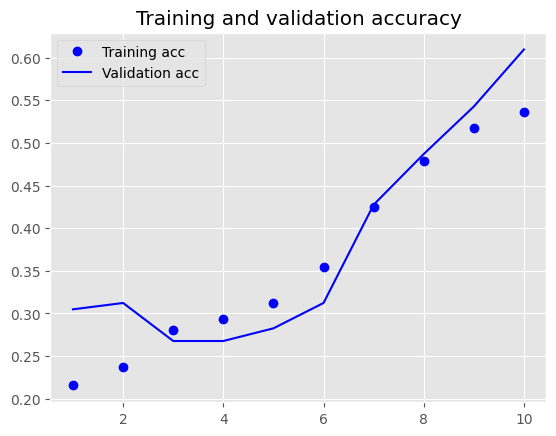

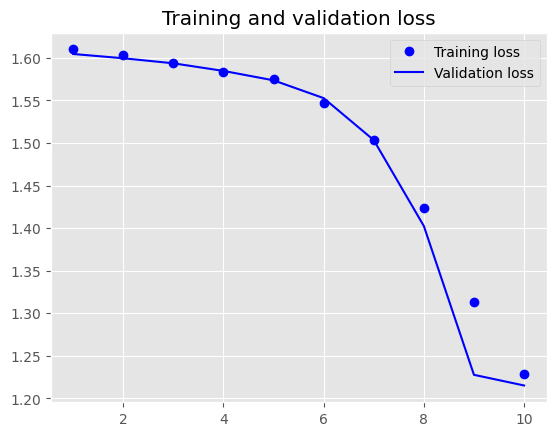

In [45]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Prediction

In [68]:
testSample=["A Night to Remember, On Sunday 18 December, Argentina take on France at Lusail Stadium in the FIFA World Cup Qatar 2022™ Final (6 PM Doha time, 4 PM CET). Now, on the biggest stage of all, only one nation can take home football’s greatest prize. Now is the moment we have all been waiting for. Now is All™."]
seq = tokenizer.texts_to_sequences(testSample)
pad = pad_sequences(seq,maxlen=max_len)
predict = model.predict(pad)
labels = data.category.unique()
print("Predicted Probabilities:",predict )
print("Predicted Category:",labels[np.argmax(predict)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Predicted Probabilities: [[0.02786438 0.23600113 0.0385235  0.6571288  0.04048219]]
Predicted Category: sport


## MultinomialNB Model

In [48]:
#Reading preprocessed data
data = pd.read_csv("_finalProcessed.csv").drop(columns=['Unnamed: 0'])
data.head()

,article,category
0,"['worldcom', 'exboss', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper', 'worldcom', 'exhead', 'intern', 'account', 'alert', 'director', 'irregular', 'account', 'practic', 'u', 'telecom', 'giant', '2002', 'warn', 'led', 'collaps', 'firm', 'follow', 'discoveri', '11bn', '£57bn', 'account', 'fraud', 'mr', 'ebber', 'plead', 'guilti', 'charg', 'fraud', 'conspiraci', 'prosecut', 'lawyer', 'argu', 'mr', 'ebber', 'orchestr', 'seri', 'account', 'trick', 'worldcom', 'order', 'employe', 'hide', 'expens', 'inflat', 'revenu', 'meet', 'wall', 'street', 'earn', 'estim', 'm', 'cooper', 'run', 'consult', 'busi', 'told', 'juri', 'new', 'york', 'wednesday', 'extern', 'auditor', 'arthur', 'andersen', 'approv', 'worldcom', 'account', 'earli', '2001', '2002', 'said', 'andersen', 'given', 'green', 'light', 'procedur', 'practic', 'use', 'worldcom', 'mr', 'ebber', 'lawyer', 'said', 'unawar', 'fraud', 'argu', 'auditor', 'alert', 'problem', 'm', 'cooper', 'also', 'said', 'sharehold', 'meet', 'mr', 'ebber', 'often', 'pas', 'technic', 'question', 'compani', 'financ', 'chief', 'give', 'brief', 'answer', 'prosecut', 'star', 'wit', 'former', 'worldcom', 'financi', 'chief', 'scott', 'sullivan', 'said', 'mr', 'ebber', 'order', 'account', 'adjust', 'firm', 'tell', 'hit', 'book', 'howev', 'm', 'cooper', 'said', 'mr', 'sullivan', 'mention', 'anyth', 'uncomfort', 'worldcom', 'account', '2001', 'audit', 'committe', 'meet', 'mr', 'ebber', 'could', 'face', 'jail', 'sentenc', '85', 'year', 'convict', 'charg', 'face', 'worldcom', 'emerg', 'bankruptci', 'protect', '2004', 'known', 'mci', 'last', 'week', 'mci', 'agre', 'buyout', 'verizon', 'commun', 'deal', 'valu', '675bn']",business
1,"['german', 'busi', 'confid', 'slide', 'german', 'busi', 'confid', 'fell', 'februari', 'knock', 'hope', 'speedi', 'recoveri', 'europ', 'largest', 'economi', 'munichbas', 'research', 'institut', 'ifo', 'said', 'confid', 'index', 'fell', '955', 'februari', '975', 'januari', 'first', 'declin', 'three', 'month', 'studi', 'found', 'outlook', 'manufactur', 'retail', 'sector', 'worsen', 'observ', 'hope', 'confid', 'busi', 'sector', 'would', 'signal', 'econom', 'activ', 'pick', 'surpris', 'ifo', 'index', 'taken', 'knock', 'said', 'dz', 'bank', 'economist', 'bernd', 'weidenstein', 'main', 'reason', 'probabl', 'domest', 'economi', 'still', 'weak', 'particularli', 'retail', 'trade', 'economi', 'labour', 'minist', 'wolfgang', 'clement', 'call', 'dip', 'februari', 'ifo', 'confid', 'figur', 'mild', 'declin', 'said', 'despit', 'retreat', 'index', 'remain', 'rel', 'high', 'level', 'expect', 'modest', 'econom', 'upsw', 'continu', 'germani', 'economi', 'grew', '16', 'last', 'year', 'shrink', '2003', 'howev', 'economi', 'contract', '02', 'last', 'three', 'month', '2004', 'mainli', 'due', 'reluct', 'consum', 'spend', 'latest', 'indic', 'growth', 'still', 'prove', 'elus', 'ifo', 'presid', 'hanswern', 'sinn', 'said', 'improv', 'german', 'domest', 'demand', 'sluggish', 'export', 'kept', 'thing', 'go', 'first', 'half', '2004', 'demand', 'export', 'hit', 'valu', 'euro', 'hit', 'record', 'level', 'make', 'german', 'product', 'less', 'competit', 'oversea', 'top', 'unemploy', 'rate', 'stuck', 'close', '10', 'manufactur', 'firm', 'includ', 'daimlerchrysl', 'siemen', 'volkswagen', 'negoti', 'union', 'cost', 'cut', 'measur', 'analyst', 'said', 'ifo', 'figur', 'germani', 'continu', 'problem', 'may', 'delay', 'interest', 'rate', 'rise', 'european', 'central', 'bank', 'eurozon', 'interest', 'rate', '2', 'comment', 'senior', 'offici', 'recent', 'focus', 'threat', 'inflat', 'prompt', 'fear', 'interest', 'rate', 'may', 'rise']",business
2,"['bbc', 'poll', 'indic', 'econom', 'gloom', 'citizen', 'major', 'nation', 'survey', 'bbc', 'world', 'servic', 'poll', 'believ', 'world', 'economi', 'worsen', 'respond', 'also', 'said', 'nation', 'economi', 'get', 'wors', 'ask', 'fam

In [49]:
X = data['article']
Y = data['category']
category = data["category"]

In [55]:
from sklearn.pipeline import Pipeline  # Import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # Import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB #Import MultinomialNB

def MultinomialNB_model(test_size):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=60, shuffle=True, stratify=category)
    nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
    nb.fit(x_train, y_train)
    y_predict = nb.predict(x_test)
    train_accuracy = round(nb.score(x_train, y_train) * 100)
    test_accuracy = round(accuracy_score(y_predict, y_test) * 100)
    return y_predict, train_accuracy, test_accuracy, x_train, x_test, y_train, y_test, nb

In [56]:
from sklearn.metrics import accuracy_score

y_predict,train_accuracy,test_accuracy,x_train, x_test, y_train, y_test,nb = MultinomialNB_model (0.3)

train_accuracy,test_accuracy

(99, 96)

In [57]:
from sklearn.metrics import classification_report

target_category = data['category'].unique()
print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(y_predict, y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       103
         tech       0.93      1.00      0.96        76
     politics       0.94      0.93      0.93        83
        sport       1.00      0.98      0.99       106
entertainment       0.96      0.95      0.96        79

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447



In [58]:
NB_df = pd.DataFrame(columns = ['Test Size','Predictions','Accuracy', 'Test'])
for i in np.arange(0.1,1.,0.1):
    acc, pred, test2, x_train2, x_test2, y_train2, y_test2, nb = MultinomialNB_model(i)
    NB_df.loc[len(NB_df.index)] = [i*100, acc, pred, test2]
NB_df

,Test Size,Predictions,Accuracy,Test
0,10.0,"[politics, entertainment, entertainment, business, sport, tech, sport, sport, politics, tech, entertainment, tech, politics, sport, business, business, business, sport, tech, sport, business, business, politics, sport, business, business, politics, politics, sport, business, entertainment, entertainment, sport, business, business, tech, tech, business, sport, politics, tech, politics, entertainment, business, business, business, entertainment, entertainment, politics, entertainment, entertainment, entertainment, sport, sport, entertainment, sport, tech, business, sport, sport, politics, politics, politics, entertainment, business, tech, politics, sport, business, business, tech, sport, business, business, tech, sport, tech, sport, politics, sport, politics, business, entertainment, business, sport, business, sport, sport, sport, business, tech, tech, entertainment, politics, sport, politics, business, business, sport, politics, ...]",99,95
1,20.0,"[business, politics, entertainment, politics, entertainment, business, sport, tech, business, business, sport, business, sport, politics, sport, sport, business, entertainment, sport, business, business, sport, politics, tech, business, sport, tech, politics, tech, entertainment, entertainment, tech, business, entertainment, business, sport, entertainment, tech, sport, entertainment, business, sport, business, sport, sport, sport, entertainment, sport, business, politics, business, entertainment, politics, business, politics, entertainment, entertainment, politics, tech, business, entertainment, business, politics, business, business, business, sport, politics, sport, tech, tech, sport, tech, tech, politics, entertainment, politics, business, tech, politics, sport, tech, sport, entertainment, entertainment, politics, business, sport, business, politics, tech, politics, entertainment, sport, entertainment, business, politics, business, entertainment, politics, ...]",99,95
2,30.0,"[business, business, tech, tech, entertainment, sport, tech, tech, tech, sport, sport, politics, entertainment, entertainment, sport, politics, tech, tech, tech, business, business, business, sport, politics, business, tech, business, politics, sport, tech, sport, business, tech, entertainment, business, sport, tech, business, business, politics, entertainment, sport, business, tech, entertainment, business, entertainment, business, sport, politics, politics, tech, sport, entertainment, entertainment, politics, sport, sport, politics, sport, business, politics, tech, politics, entertainment, sport, business, sport, business, business, sport, business, sport, business, sport, tech, politics, business, tech, business, sport, politics, entertainment, sport, tech, politics, sport, politics, entertainment, tech, business, business, business, business, business, sport, business, sport, sport, politics, ...]",99,96
3,40.0,"[tech, sport, entertainment, entertainment, politics, business, business, business, business, tech, politics, sport, entertainment, politics, sport, politics, business, business, tech, politics, politics, entertainment, business, tech, sport, entertainment, tech, tech, sport, sport, politics, business, tech, business, sport, tech, politics, entertainment, business, tech, tech, sport, tech, entertainment, business, sport, tech, entertainment, business, entertainment, tech, entertainment, entertainment, business, entertainment, politics, politics, politics, sport, tech, politics, sport, sport, business, politics, politics, sport, sport, sport, politics, politics, sport, business, sport, tech, sport, business, sport, business, tech, business, tech, business, politics, sport, entertainment, entertainment, business, tech, entertainment, business, business, entertainment, entertainment, business, politics, tech, entertainment, business, business, ...]",99,96
4,50.0,"[sport, tech, sport, entertainment, sport, sport, tech, politics, tech, entertainment, sport, 

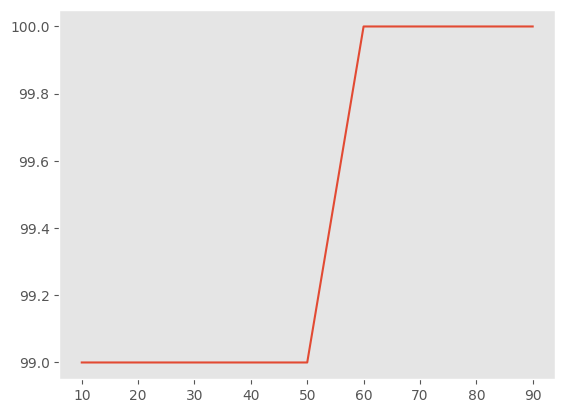

In [59]:
plt.plot(NB_df['Test Size'], NB_df['Accuracy'])
plt.grid()
plt.show()

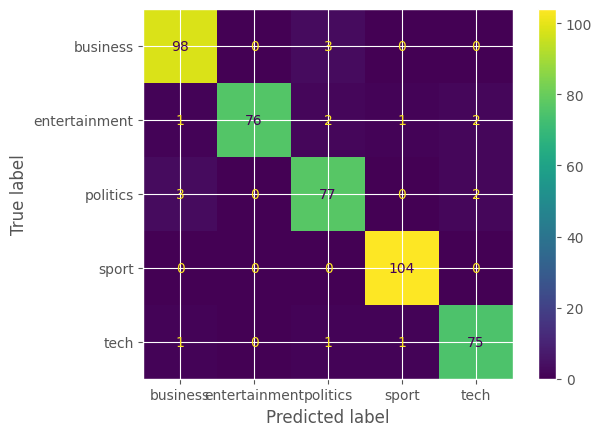

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_predict)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=nb.classes_)
disp.plot()
plt.show()

## Prediction

In [66]:
# -- NB prediction part --
test_text = ["A Night to Remember, On Sunday 18 December, Argentina take on France at Lusail Stadium in the FIFA World Cup Qatar 2022™ Final (6 PM Doha time, 4 PM CET). Now, on the biggest stage of all, only one nation can take home football’s greatest prize. Now is the moment we have all been waiting for. Now is All™."]

# Predict probabilities
nb_probabilities = nb.predict_proba(test_text)

# Print the raw probabilities
print("Predicted Probabilities:", nb_probabilities)

# Find the predicted label
predicted_label = nb.classes_[np.argmax(nb_probabilities)]

print("Predicted Category:", predicted_label)




Predicted Probabilities: [[0.18800168 0.1913174  0.15219557 0.31863434 0.149851  ]]
Predicted Category: sport


In [ ]:
!pip install joblib

In [70]:
import joblib
# Save model

joblib.dump(nb, 'NB_model.pkl')
print("Naive Bayes model saved as 'NB_model.pkl'")

Naive Bayes model saved as 'NB_model.pkl'
